# Übungen zu Ensemble Methoden

## Aufgabe 1  (Theorie)

1) Was ist das Ziel von den Boosting Algorithmus?

Vorgegeben ist eine Reihe von Objekten und eine Reihe schwacher Klassifikatoren. Gesucht ist ein Klassifikator, der die Objekte möglichst fehlerfrei in zwei Klassen einteilt. Boosting kombiniert die vorhandenen schwachen Klassifikatoren so, dass der entstehende neue Klassifikator möglichst wenige Fehler macht.

2) Was versteht man unter `Bootstrapping` und wo wird es benötig? 

Bootstrapping bedeutet, dass je Ziehung aus der gegebenen Stichprobe ein Wert mit Zurücklegen gezogen wird. Es ist eine der wichtigsten Ideen hinter Bagging (was für Bootstrap AGGregatING steht).

3) Was verteht man unter `Konfusionsmatrix` ?

Eine Konfusionsmatrix zeigt wie viele Beobactungen Richtig oder Falsch angeordnet wurden sind im Vergleich zu die erste Hervorsage. <br>
z.B Für 30 Männer die ein Erfolg hatten wurde richtig auch ein Erfolg vorhergesagt.
Für 6 Männer die ein Korb hatten wurde falsch ein Erfolg vorhergesagt. usw.

## Aufgabe 2 : Random Forest 

Für diese Aufgabe benötigen Sie den echten Datensatz von Herzerkrankungen von die UCI machine learning repository.  
Url für den Datasatz: http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Informationen über den Datasatz: http://archive.ics.uci.edu/ml/datasets/Heart+Disease

### 2.1 Daten bearbeiten

1) Betrachten Sie die ersten Zeile des Datensatzes. Benennen Sie sinnvoll die Variablen um, mit Hilfe der oben angegebenen Seite.

2) Geben Sie die Struktur des Datensatzes aus. Falls es Missings gibt (?), ersetzen Sie die mit "NA". Addieren Sie Faktoren für die Variablen die Faktoren sind und überprüfen Sie, ob alles geklappt hat. <br>

**Hinweis Nr.1 :** Für die Variable "Sex" müssen Sie erst eine ifelse-Methode benutzen wie folgt : `data$sex <- ifelse(test=data$sex ==0, yes="F", no= "M")` und dann den Faktor addieren. Die gleiche Methode wird auch bei der Variable "num"(diagnosis of heart disease) benötigt. Geben Sie die zwei Werte : Healthy & Unhealthy

**Hinweis Nr.2 :** Variablen die ein "NA" enthalten, müssen erst als integer definiert werden und dann als Faktoren
### 2.2 Random Forest bilden. 

1) Library(randomForest) und set.seed(42) einfügen,dass jeder den gleichen Random Forest generiert. <br>
2) Erst müssen Sie für die "NA"s  mit Hilfe der [rfImpute](https://www.rdocumentation.org/packages/randomForest/versions/4.6-14/topics/rfImpute) function Werte angeben. 

3) `hd` ist die Variable, die den Random Forest vorhersagen soll. Legen Sie die Anzahl von Iterationen gleich 6 fest. Jetzt können Sie das Random Forest mit 300 Bäume generieren.

4) Intepretieren Sie den Wert von `OOB estimate of  error rate` und berechnen Sie den Durchschnitt des OOB- Fehlerschätzers. Was verstehen Sie unter diesem Wert? 

5) Zeigen Sie welche Variablen am wicthigsten sind.

6) Intepretieren Sie, ob die angegebe Anzahl von Bäume, eine gute Anzahl für unseren Datensatz ist.

### Lösung

1)

In [1]:
# Datensatz einlesen
url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
 
data <- read.csv(url, header=FALSE)

In [2]:
#Erste sechs Zeilen anzeigen
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [3]:
# Lebels vergeben 
# Kommentare von "http://archive.ics.uci.edu/ml/datasets/Heart+Disease"
colnames(data) <- c(
  "age",
  "sex",# 0 = female, 1 = male
  "cp", # chest pain
          # 1 = typical angina,
          # 2 = atypical angina,
          # 3 = non-anginal pain,
          # 4 = asymptomatic
  "trestbps", # resting blood pressure (in mm Hg)
  "chol", # serum cholestoral in mg/dl
  "fbs",  # fasting blood sugar greater than 120 mg/dl, 1 = TRUE, 0 = FALSE
  "restecg", # resting electrocardiographic results
          # 1 = normal
          # 2 = having ST-T wave abnormality
          # 3 = showing probable or definite left ventricular hypertrophy
  "thalach", # maximum heart rate achieved
  "exang",   # exercise induced angina, 1 = yes, 0 = no
  "oldpeak", # ST depression induced by exercise relative to rest
  "slope", # the slope of the peak exercise ST segment
          # 1 = upsloping
          # 2 = flat
          # 3 = downsloping
  "ca", # number of major vessels (0-3) colored by fluoroscopy
  "thal", # this is short of thalium heart scan
          # 3 = normal (no cold spots)
          # 6 = fixed defect (cold spots during rest and exercise)
          # 7 = reversible defect (when cold spots only appear during exercise)
  "hd" # (the predicted attribute) - diagnosis of heart disease
          # 0 if less than or equal to 50% diameter narrowing
          # 1 if greater than 50% diameter narrowing
  )

In [4]:
#Datensatz anschauen mit neuen Lebels
data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


2)

In [5]:
# Struktur des Datensatzes
str(data) 
# ca und thal enthalten Missings "?" 
# sex, cp, fbs, restecg, exang, slope, ca, thal und hd sollten Faktoren sein.

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : num  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num  3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 5 levels "?","0.0","1.0",..: 2 5 4 2 2 2 4 2 3 2 ...
 $ thal    : Factor w/ 4 levels "?","3.0","6.0",..: 3 2 4 2 2 2 2 2 4 4 ...
 $ hd      : int  0 2 1 0 0 0 3 0 2 1 ...


In [6]:
# Missings mit "NA" ersetzen.
data[data == "?"] <- NA
# Faktoren setzen
data$sex <- ifelse(test=data$sex ==0, yes="F", no= "M")

data$sex <- as.factor(data$sex)
 
data$cp <- as.factor(data$cp)
data$fbs <- as.factor(data$fbs)
data$restecg <- as.factor(data$restecg)
data$exang <- as.factor(data$exang)
data$slope <- as.factor(data$slope)
 
data$ca <- as.integer(data$ca) # Wir haben hier die "?" mit "NA" ersetzt.
                               #  R denkt jetzt, dass die "Levels" für den Faktor
                               # von Typ string sind, aber wir wissen, dass die 
                               # integers sind. So muss man erst die Strings als                               # convert the strings to integiers...
data$ca <- as.factor(data$ca)  # integers definieren und dann als Faktor.
 
data$thal <- as.integer(data$thal) # ..."thal" hatte auch "?"
data$thal <- as.factor(data$thal)
 
## Die nächsten Zeilen ersetzen 0 und 1 mit "Healthy" und "Unhealthy"

data$hd <- ifelse(test=data$hd == 0, yes="Healthy", no="Unhealthy")
data$hd <- as.factor(data$hd) # Now convert to a factor


In [7]:
#Datensatz anschauen und überprüfen, ob alles gut gelaufen ist.
data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
63,M,1,145,233,1,2,150,0,2.3,3,2,3,Healthy
67,M,4,160,286,0,2,108,1,1.5,2,5,2,Unhealthy
67,M,4,120,229,0,2,129,1,2.6,2,4,4,Unhealthy
37,M,3,130,250,0,0,187,0,3.5,3,2,2,Healthy
41,F,2,130,204,0,2,172,0,1.4,1,2,2,Healthy
56,M,2,120,236,0,0,178,0,0.8,1,2,2,Healthy
62,F,4,140,268,0,2,160,0,3.6,3,4,2,Unhealthy
57,F,4,120,354,0,0,163,1,0.6,1,2,2,Healthy
63,M,4,130,254,0,2,147,0,1.4,2,3,4,Unhealthy
53,M,4,140,203,1,2,155,1,3.1,3,2,4,Unhealthy


In [8]:
#Überprüfung von Faktoren.
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 4 levels "2","3","4","5": 1 4 3 1 1 1 3 1 2 1 ...
 $ thal    : Factor w/ 3 levels "2","3","4": 2 1 3 1 1 1 1 1 3 3 ...
 $ hd      : Factor w/ 2 levels "Healthy","Unhealthy": 1 2 2 1 1 1 2 1 2 2 ...


#### 2.2 
1)

In [9]:
#Random Forest Bibliothen einfügen.
library(randomForest) 
set.seed(42)

Warning message:
"package 'randomForest' was built under R version 3.4.4"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


2)

In [10]:
#Fehlenden Werte im Trainingsdatensatz unter Verwendung von Ähnlichkeiten (proximities) imputieren.
data.imputed <- rfImpute(hd ~ ., data = data,ntree=300, iter=6)
#iter = Anzahl von Iterationen

ntree      OOB      1      2
  300:  17.49% 12.80% 23.02%
ntree      OOB      1      2
  300:  16.83% 14.02% 20.14%
ntree      OOB      1      2
  300:  17.82% 13.41% 23.02%
ntree      OOB      1      2
  300:  17.49% 14.02% 21.58%
ntree      OOB      1      2
  300:  17.16% 12.80% 22.30%
ntree      OOB      1      2
  300:  18.15% 14.63% 22.30%


3)

In [11]:
# Random Forest bilden mit "hd" als Prädiktor , data.imputed als unser Trainingdatensatz, 
# importance=TRUE lässt danach die Wichtigkeiten der Variablen berechnen, mtry=3 3 Variablen werden für 
# Baum zufällig ausgewählt, ntree Anzahl der Bäumen,replace mit zurücklegen, do.trace output anzeigen 
model <- randomForest(hd ~ ., data=data.imputed, importance=TRUE, mtry=3,ntree=300,
                     replace=TRUE, do.trace=TRUE)

ntree      OOB      1      2
    1:  25.71% 27.66% 24.14%
    2:  24.58% 20.21% 29.41%
    3:  24.89% 21.01% 29.25%
    4:  27.94% 24.03% 32.20%
    5:  26.89% 26.24% 27.64%
    6:  23.10% 21.33% 25.20%
    7:  24.48% 20.89% 28.91%
    8:  23.89% 22.01% 26.12%
    9:  22.90% 21.88% 24.09%
   10:  22.74% 20.99% 24.82%
   11:  21.52% 18.40% 25.18%
   12:  23.18% 19.63% 27.34%
   13:  20.79% 17.07% 25.18%
   14:  21.45% 17.68% 25.90%
   15:  21.45% 18.29% 25.18%
   16:  22.77% 19.51% 26.62%
   17:  21.12% 15.85% 27.34%
   18:  21.12% 16.46% 26.62%
   19:  19.47% 14.63% 25.18%
   20:  18.81% 12.80% 25.90%
   21:  19.47% 14.02% 25.90%
   22:  18.48% 13.41% 24.46%
   23:  17.82% 13.41% 23.02%
   24:  17.16% 11.59% 23.74%
   25:  18.15% 12.80% 24.46%
   26:  17.82% 13.41% 23.02%
   27:  17.49% 12.20% 23.74%
   28:  18.81% 13.41% 25.18%
   29:  17.49% 12.80% 23.02%
   30:  18.48% 13.41% 24.46%
   31:  17.49% 12.80% 23.02%
   32:  16.50% 11.59% 22.30%
   33:  17.82% 11.59% 25.18%
   34:  17.49%

4)

In [12]:
model


Call:
 randomForest(formula = hd ~ ., data = data.imputed, importance = TRUE,      mtry = 3, ntree = 300, replace = TRUE, do.trace = TRUE) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 3

        OOB estimate of  error rate: 16.17%
Confusion matrix:
          Healthy Unhealthy class.error
Healthy       145        19   0.1158537
Unhealthy      30       109   0.2158273

OOB Fehlerschätzer ist gleich 16.2%. Das heißt, 83.8% der Beobactungen wurden richtig classifiziert in das Random Forest.

In [13]:
model$oob.times
mean(model$oob.times)

[1] 111 110 110 116 100 107 108 117 110 103 106 105 112  96 121 109 120 101
 [19] 112 103 112 118 115 115 121 121  94 124 106 107  97 122 100 117 109 112
 [37] 105  97 104 119  96 106 121 115 110 103  88  99 113 112 109 105 100 111
 [55]  95 116 107 108 112 117  96 106  98 119 120 103 105 115 119 124 112 117
 [73] 105 121 116 113 119 115 100 113 109 110 104 115 114 114 113 111 102 105
 [91] 112 120 134 118 115 111  95  96 115 103 110 116 105 113 113 114 113 105
[109] 129 119 107 110 111 112 102 115 107 106 103 103 103 112 114 104 110 104
[127] 106 109 113 116 106 115 119 113 124 115 112 107  97  91 112 121 108 102
[145] 106 101 112 113 124  90 112 107 107 109  99 109 114 102 107  97 102  97
[163] 114 114 100 114 109 100 108 113 114 120 106 107 108 101 101 103  97  95
[181] 117 119 116 126 112 100 113 113 111 115 117 112 113 119 119 105 107 113
[199] 130 106 105  99 105 117 103 115 108 115 101 118 107 107 109 103 107 111
[217] 103 110 111 108 108 102 121 111 110 124 110 127 116  89 112 100 114 111
[235] 106  99 107 111 109 123 108 113 108 105 119 106 123 123 117 111 109 106
[253] 112 109 119  91 107 110 116 123 115  97 113 114 127 112  98 117 105 113
[271] 110 101  99 107 121 117 123 103 105 115 107 113 121 114 120 109 124 101
[289] 122  99 100 122 101 109 111 101 112 106 118 102 123 123 107

[1] 110.0066

Es wird ein OOB-Durchschnitt von 110 angerechnet.
Das heißt ca. 110 Mal wurde ein Patient nicht für die Erstellung eines Bäumes ausgewählt.

,MeanDecreaseAccuracy,MeanDecreaseGini
age,4.7097322,12.904461
sex,10.5286039,4.733890
cp,15.2700702,20.303524
trestbps,2.4344643,11.295547
chol,0.1101471,11.986583
fbs,-0.1416741,1.141617
restecg,1.8113744,2.566746
thalach,7.4364805,16.289851
exang,9.8465527,8.222180
oldpeak,12.0501247,15.589994


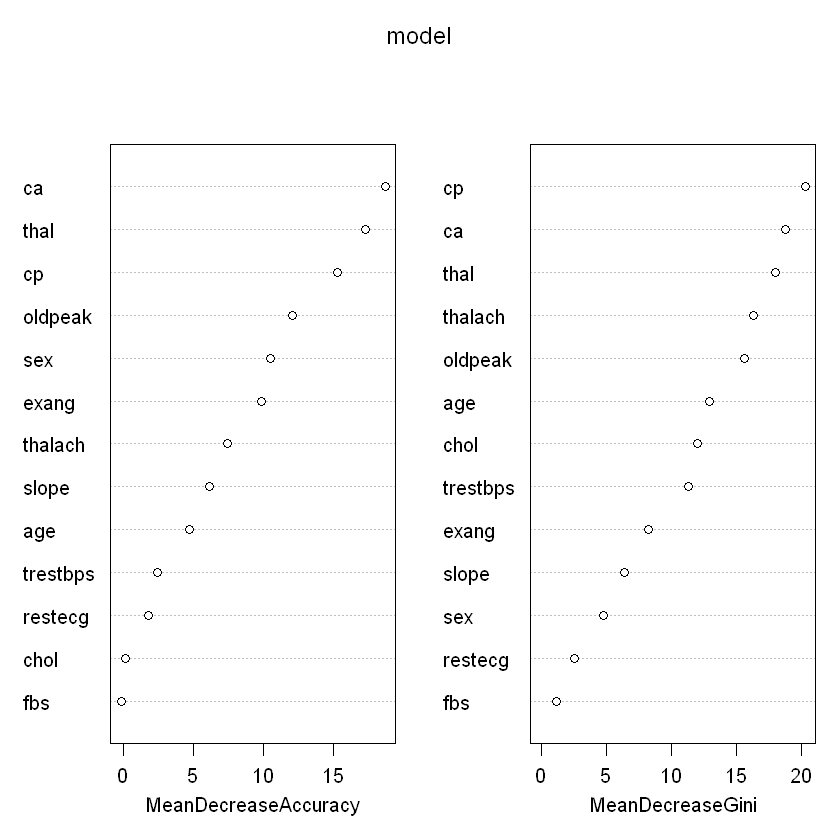

In [14]:
#Variablenwichtigkeit
imp <- varImpPlot(model)
imp

6)

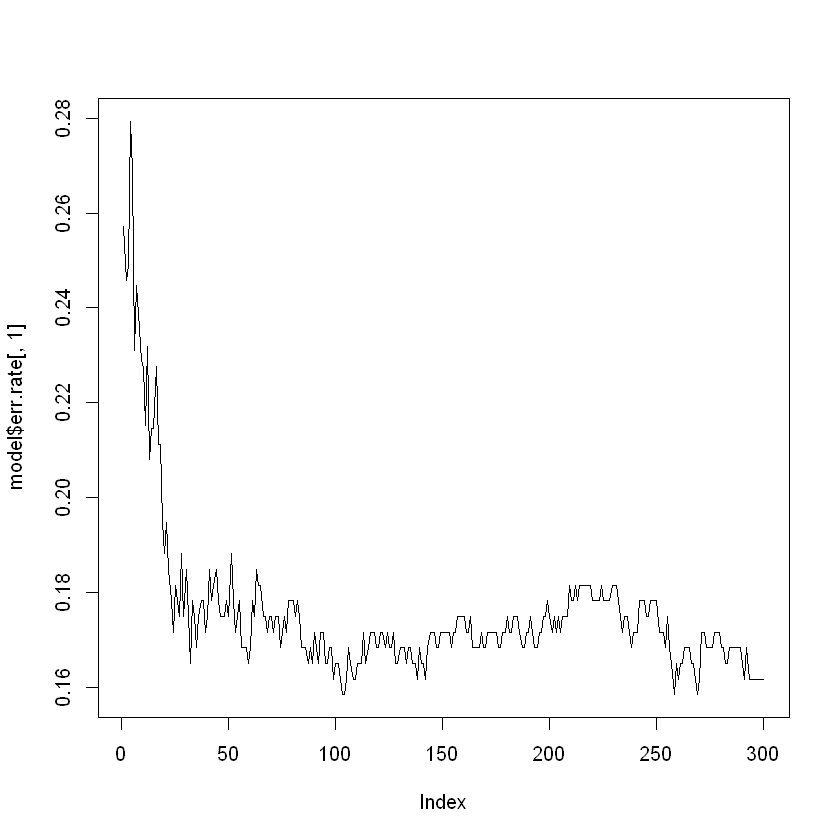

In [15]:
# Diagramm darstellen um zu gucken, ob die Anzahl von Bäume die richtige Anzahl für unser Random Forest ist.
plot(model$err.rate[,1], type="l")

300 Bäume ist eine gute Anzahl von Bäumen für unser Random Forest, da der OOB-Fehler einigermaßen stabil bleibt und sehr niedrig ist. Man kann auch sagen, dass 100 Bäume auch eine gute Anzahl von Bäumen wäre, da der OOB- Fehler nach die 100 Bäume sich nicht groß ändert und niedrig bleibt.